In [6]:
from pandas import Series, Timestamp, DataFrame
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import spacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


In [9]:
def load_jsons(data_path, file):
    """ helper function to load '.json' files (they're not proper jsons) """
    file_path = data_path + file
    with open(file_path) as jsons:
        lines = [json.loads(json_line) for json_line in jsons]
    return pd.DataFrame(lines)

In [3]:
# Load data for town called Ambridge
data_path = '../data/brossard/'

# Seperate the files 
review_file = 'review.json'
business_file = 'business.json'


reviews = load_jsons(data_path, review_file)
businesses = load_jsons(data_path, business_file).set_index("business_id")

In [4]:
def split_data(data, d = 0.75):
    np.random.seed(seed=5)
    mask_test = np.random.rand(data.shape[0]) < d
    return data[mask_test], data[~mask_test]

reviews_training, reviews_test = split_data(reviews, d = 0.9)

In [30]:
def pivot_ratings(df):
    return df.pivot_table(values='stars', columns='user_id', index='review_id')

utility_ratings = pivot_ratings(reviews)
display(utility_ratings.head())

user_id,-3uEQhR9MXaC5QTHJ4lraw,-9Y_03tqxxxaFrz5x-QZiw,00VGQdtbdvfYfxZIPniAqQ,01vXmAJKQ41PVi2wgYDiPA,0N91KZHstHSnKwJVRa2p2g,0WygCUOgOMxucwZsrYru9w,135DbbQnr3BEkQbBzZ9T1A,1gJw6DxTrf0Zmp9gDgYlrQ,1kcOj0Ch394fLiUaC_fD9g,1q47TqjCRH92PhXIA9t9kA,...,wqrkoO4OISQ9LudoQhbdXw,wvLzHjWKwkCuEzWdTVdiGg,xA4ERJDFuPDBg-0U_G3llg,xBK-ElArbwMaonFFAI4NAA,xP53fNYIx6ZNoTqSXrT5gQ,y4a_7xpbvRvCGwMNY4iRhQ,ymgPMjIYBhFoNoM8Q7wsMA,z7cR4xXpRrTV55LHDM9SBg,zgQBhM1KePf1iFphbJL3yA,zuAt2Htm1-AKs_fXuuOPcg
review_id,,,,,,,,,,,,,,,,,,,,,
-YaP5MYIQcRV6svSZdHKOw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-_cVQ11Ms1nWRmZsr9f64w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN
-izvD8ow0Na4XOUKliJ7zw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-t4ViQIeOAi7Mb5h3lfihg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0-3RFQyFj9Jpl9b2GZj-yA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN


In [31]:
display(reviews_training.head())
display(businesses.head())
display(utility_ratings.head())

review_id                 user_id             business_id  \
0  Ccc3ZAXEw69lGZg5oAZKHw  YZ7S0_eemKwWR5tHkaMUqw  JD55YRLwptXJVkMRekbzNg   
1  aZOOTcXB28ftRZJnQDMjjA  UiU_yqwSQwTZdw3vxD_Aag  JD55YRLwptXJVkMRekbzNg   
2  9qRSlEj4Rcd3NXektgI1hA  vu9dmqZiZSm3ijUP-7HmKA  VvZnozdEpjw0e7Dg-kKIxg   
4  22vF44g9TIDsQOpmvVVg6A  _FKhZ0r6uTBNHA_ALWyGqg  KE7cmEKW8IwMFAdmzP72rQ   
5  Dh3cd2NftMcHujCLdtsKLg  fHKUUSRX1weaARD1XCQC_w  kVKCzeRWO6OleRqho57fAQ   

   stars  useful  funny  cool  \
0    2.0       0      0     0   
1    4.0       0      0     0   
2    4.0       0      0     0   
4    1.0       1      0     0   
5    4.0       0      0     0   

                                                text                 date  \
0  Best place to get ice cream. They have only tw...  2018-08-14 04:03:02   
1  Sorry to say, Nelias did not live up to the ot...  2015-12-05 23:21:39   
2  Wouldn't give it one star if I could. This pla...  2015-08-07 19:33:13   
4  There is nothing fancy about this place - it i...  2013-04-13 15:58:06   
5  I go here for the filipino food they serve whi...  2014-05-10 05:19:41   

   total reviews_training  total words  
0                     0.0           79  
1                     1.0           40  
2                     2.0           44  
4                     4.0           46  
5                     5.0           89

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
business_id,,,,,,,,,,,,,
ijf9tBHePS0hpZ9GdZwz8g,Crux Comptoir,"9180 Boulevard Leduc, Suite 115",Brossard,QC,J4Y 0L1,45.446590,-73.437164,5.0,5,1,"{'Ambience': 'None', 'RestaurantsReservations'...","Juice Bars & Smoothies, Restaurants, Organic S...","{'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ..."
KQOnL835AZEL9k881euCPQ,Le Magnolia,"7350 Blvd Taschereau, 44D",Brossard,QC,J4W 1,45.459506,-73.467366,2.0,4,1,{'RestaurantsPriceRange2': '1'},"Shopping, Flowers & Gifts, Florists",None
J9j4TAdPOwwUDhFTCiZOVA,Quartier Dix-30,6000 Boulevard Rome,Brossard,QC,J4Y 0B6,45.441072,-73.440259,3.5,23,1,"{'BikeParking': 'True', 'DogsAllowed': 'True',...","Shopping Centers, Shopping","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
qxdZWoRVwf4lpI_gjAN2gA,Le Bol d'or / Golden Bowl,1200 Boulevard Rome,Brossard,QC,J4W 3H3,45.457785,-73.490531,2.5,15,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Chinese, Restaurants",None
6qa_KEqzJ9rqm70qqRly0w,Mon Ami - Brossard,5455 Boulevard Grande-Allée,Brossard,QC,J4Z 3H1,45.477253,-73.447508,4.0,8,1,"{'HasTV': 'True', 'RestaurantsPriceRange2': '2...","Buffets, Barbeque, Korean, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ..."


user_id                 -3uEQhR9MXaC5QTHJ4lraw  -9Y_03tqxxxaFrz5x-QZiw  \
review_id                                                                
-YaP5MYIQcRV6svSZdHKOw                     NaN                     NaN   
-_cVQ11Ms1nWRmZsr9f64w                     NaN                     NaN   
-izvD8ow0Na4XOUKliJ7zw                     NaN                     NaN   
-t4ViQIeOAi7Mb5h3lfihg                     NaN                     NaN   
0-3RFQyFj9Jpl9b2GZj-yA                     NaN                     NaN   

user_id                 00VGQdtbdvfYfxZIPniAqQ  01vXmAJKQ41PVi2wgYDiPA  \
review_id                                                                
-YaP5MYIQcRV6svSZdHKOw                     NaN                     NaN   
-_cVQ11Ms1nWRmZsr9f64w                     NaN                     NaN   
-izvD8ow0Na4XOUKliJ7zw                     NaN                     NaN   
-t4ViQIeOAi7Mb5h3lfihg                     NaN                     NaN   
0-3RFQyFj9Jpl9b2GZj-yA                     NaN                     NaN   

user_id                 0N91KZHstHSnKwJVRa2p2g  0WygCUOgOMxucwZsrYru9w  \
review_id                                                                
-YaP5MYIQcRV6svSZdHKOw                     NaN                     NaN   
-_cVQ11Ms1nWRmZsr9f64w                     NaN                     NaN   
-izvD8ow0Na4XOUKliJ7zw                     NaN                     NaN   
-t4ViQIeOAi7Mb5h3lfihg                     NaN                     NaN   
0-3RFQyFj9Jpl9b2GZj-yA                     NaN                     NaN   

user_id                 135DbbQnr3BEkQbBzZ9T1A  1gJw6DxTrf0Zmp9gDgYlrQ  \
review_id                                                                
-YaP5MYIQcRV6svSZdHKOw                     NaN                     NaN   
-_cVQ11Ms1nWRmZsr9f64w                     NaN                     NaN   
-izvD8ow0Na4XOUKliJ7zw                     NaN                     NaN   
-t4ViQIeOAi7Mb5h3lfihg                     NaN                     NaN   
0-3RFQyFj9Jpl9b2GZj-yA                     NaN                     NaN   

user_id                 1kcOj0Ch394fLiUaC_fD9g  1q47TqjCRH92PhXIA9t9kA  ...  \
review_id                                                               ...   
-YaP5MYIQcRV6svSZdHKOw                     NaN                     NaN  ...   
-_cVQ11Ms1nWRmZsr9f64w                     NaN                     NaN  ...   
-izvD8ow0Na4XOUKliJ7zw                     NaN                     NaN  ...   
-t4ViQIeOAi7Mb5h3lfihg                     NaN                     NaN  ...   
0-3RFQyFj9Jpl9b2GZj-yA                     NaN                     NaN  ...   

user_id                 wqrkoO4OISQ9LudoQhbdXw  wvLzHjWKwkCuEzWdTVdiGg  \
review_id                                                                
-YaP5MYIQcRV6svSZdHKOw                     NaN                     NaN   
-_cVQ11Ms1nWRmZsr9f64w                     NaN                     NaN   
-izvD8ow0Na4XOUKliJ7zw                     NaN                     NaN   
-t4ViQIeOAi7Mb5h3lfihg                     NaN                     NaN   
0-3RFQyFj9Jpl9b2GZj-yA                     NaN                     NaN   

user_id                 xA4ERJDFuPDBg-0U_G3llg  xBK-ElArbwMaonFFAI4NAA  \
review_id                                                                
-YaP5MYIQcRV6svSZdHKOw                     NaN                     NaN   
-_cVQ11Ms1nWRmZsr9f64w                     NaN                     NaN   
-izvD8ow0Na4XOUKliJ7zw                     NaN                     NaN   
-t4ViQIeOAi7Mb5h3lfihg                     NaN                     NaN   
0-3RFQyFj9Jpl9b2GZj-yA                     NaN                     NaN   

user_id                 xP53fNYIx6ZNoTqSXrT5gQ  y4a_7xpbvRvCGwMNY4iRhQ  \
review_id                                                                
-YaP5MYIQcRV6svSZdHKOw                     NaN                     NaN   
-_cVQ11Ms1nWRmZsr9f64w                     NaN                     NaN   
-izvD8ow0Na4XOUKliJ7zw              

C:\Users\bdvdb\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\bdvdb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,total reviews_training,total words
0,Ccc3ZAXEw69lGZg5oAZKHw,YZ7S0_eemKwWR5tHkaMUqw,JD55YRLwptXJVkMRekbzNg,2.0,0,0,0,Average food and service. Kind of dirty and so...,2017-08-16 04:35:11,0.0,31
1,aZOOTcXB28ftRZJnQDMjjA,UiU_yqwSQwTZdw3vxD_Aag,JD55YRLwptXJVkMRekbzNg,4.0,0,0,0,Probably one of the best Vietnamese restaurant...,2017-12-02 20:13:24,1.0,39
2,9qRSlEj4Rcd3NXektgI1hA,vu9dmqZiZSm3ijUP-7HmKA,VvZnozdEpjw0e7Dg-kKIxg,4.0,0,0,0,"Petit restaurant, déco un peu vieillote, mais ...",2014-10-27 03:10:16,2.0,26
4,22vF44g9TIDsQOpmvVVg6A,_FKhZ0r6uTBNHA_ALWyGqg,KE7cmEKW8IwMFAdmzP72rQ,1.0,1,0,0,Pour un restaurant Italien qui pense que Sauce...,2015-06-08 19:09:25,4.0,53
5,Dh3cd2NftMcHujCLdtsKLg,fHKUUSRX1weaARD1XCQC_w,kVKCzeRWO6OleRqho57fAQ,4.0,0,0,0,My friend and I paid $25 each (taxes included)...,2014-05-26 03:46:24,5.0,77
...,...,...,...,...,...,...,...,...,...,...,...
1771,fW2Hku9crNjMhncLRrBOUQ,DGW1RUVIAYi_hU8kP4-cZA,pTky9hiaJf6ns-yBhf-pHA,4.0,0,0,0,"J'aime bien ce petit Resto, ambiance in et déc...",2015-11-05 05:47:45,NaN,30
1772,NkZ6BmAjJ5PxJfoKC29h0Q,jTr6-hM8ZB18KwG4WbZhXw,xLDU3RQ1Ni_wTioEib_VIQ,5.0,0,0,0,"When we visit my mother in law, who lives near...",2018-07-26 00:55:53,NaN,94
1773,8xS8UQZPicbpqHav4Yilmg,yIFyaNq4oCLoYkY1Gi0XAw,KzZcH8Ez81xcyKFsVjR30A,2.0,0,0,0,Wasn't impressed with the beef tartare. It's m...,2017-08-13 03:19:05,NaN,72
1774,ajjJ7s7uiSMMmlQ8fejN2g,XPFdg4yXyx--472peBfNBQ,M27znLkIIhkGvbNLMsd90w,1.0,0,0,0,I never write reviews but this experience was ...,2015-07-15 21:41:02,NaN,113


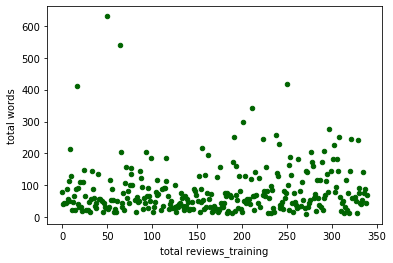

In [32]:
reviews_training['total reviews_training'] = pd.Series(list(range(len(reviews_training))))
reviews_training['total words'] = reviews_training['text'].str.split().str.len()
display(reviews_training)

graph = reviews_training.plot.scatter(x='total reviews_training', y='total words', color='Darkgreen')

# The functions below were taken and modified from bit.ly/2T8vnLe

In [33]:
tfidf = TfidfVectorizer(stop_words = "english")

#Only use reviews which consists of more than 50 characters
reviews = reviews[reviews["text"].apply(lambda x: len(x) > 50)]

reviews["text"] = reviews["text"].fillna("")

#Construct the required TF-IDF matrix by applying the fit_transform method on the overview feature
overview_matrix = tfidf.fit_transform(reviews["text"])

In [34]:
similarity_matrix = pd.DataFrame(linear_kernel(overview_matrix, overview_matrix))

all_business_ids = []
for row in reviews.values:
    all_business_ids.append(row[0])

# all_business_ids.pop(340)
test = similarity_matrix.values

similarity_matrix2 = pd.DataFrame(index = all_business_ids, columns = all_business_ids, data = test)
display(similarity_matrix2)

qb2EVdmVNvw3D0kBMN6Xrg  Ecr_pKR7786kmcLVXLp5NA  \
qb2EVdmVNvw3D0kBMN6Xrg                1.000000                0.012964   
Ecr_pKR7786kmcLVXLp5NA                0.012964                1.000000   
Ro6-JL0KCS5JULXUNRST-w                0.010676                0.080287   
tuDIfqFjtj5zTLjtY9W1Hg                0.031087                0.000000   
zw3oXGWKQdVjST5UI9kM3g                0.006108                0.120397   
...                                        ...                     ...   
_mw0xf5enQSEUMUAoIiLZg                0.000000                0.000000   
iKcapQ8yQ1PyVj2aZ7qEuQ                0.000000                0.022104   
1rYRDNCQMue4ptTfVw1NRA                0.043485                0.000000   
G6HnqzjaG3Jcb_NlfyNcbg                0.058665                0.000000   
za8LmQuhQbpnmym_rS8t9Q                0.000000                0.000000   

                        Ro6-JL0KCS5JULXUNRST-w  tuDIfqFjtj5zTLjtY9W1Hg  \
qb2EVdmVNvw3D0kBMN6Xrg                0.010676                0.031087   
Ecr_pKR7786kmcLVXLp5NA                0.080287                0.000000   
Ro6-JL0KCS5JULXUNRST-w                1.000000                0.000000   
tuDIfqFjtj5zTLjtY9W1Hg                0.000000                1.000000   
zw3oXGWKQdVjST5UI9kM3g                0.059458                0.006536   
...                                        ...                     ...   
_mw0xf5enQSEUMUAoIiLZg                0.000000                0.014264   
iKcapQ8yQ1PyVj2aZ7qEuQ                0.000000                0.018424   
1rYRDNCQMue4ptTfVw1NRA                0.029026                0.005811   
G6HnqzjaG3Jcb_NlfyNcbg                0.021233                0.011723   
za8LmQuhQbpnmym_rS8t9Q                0.017496                0.000000   

                        zw3oXGWKQdVjST5UI9kM3g  E0pUvxHQZPDXTPAHoCXMiw  \
qb2EVdmVNvw3D0kBMN6Xrg                0.006108                0.025413   
Ecr_pKR7786kmcLVXLp5NA                0.120397                0.120191   
Ro6-JL0KCS5JULXUNRST-w                0.059458                0.046135   
tuDIfqFjtj5zTLjtY9W1Hg                0.006536                0.035706   
zw3oXGWKQdVjST5UI9kM3g                1.000000                0.217309   
...                                        ...                     ...   
_mw0xf5enQSEUMUAoIiLZg                0.000000                0.000000   
iKcapQ8yQ1PyVj2aZ7qEuQ                0.000000                0.000000   
1rYRDNCQMue4ptTfVw1NRA                0.056346                0.050761   
G6HnqzjaG3Jcb_NlfyNcbg                0.110756                0.080257   
za8LmQuhQbpnmym_rS8t9Q                0.000000                0.000000   

                        NYapwdsUSWCqb0euExz3Mg  Fwj3ZX8alvOOaQTSeFNNTw  \
qb2EVdmVNvw3D0kBMN6Xrg                0.014712                0.017558   
Ecr_pKR7786kmcLVXLp5NA                0.000000                0.000000   
Ro6-JL0KCS5JULXUNRST-w                0.000000                0.014530   
tuDIfqFjtj5zTLjtY9W1Hg                0.124301                0.011635   
zw3oXGWKQdVjST5UI9kM3g                0.043791                0.045998   
...                                        ...                     ...   
_mw0xf5enQSEUMUAoIiLZg                0.055559                0.000000   
iKcapQ8yQ1PyVj2aZ7qEuQ                0.000000                0.000000   
1rYRDNCQMue4ptTfVw1NRA                0.088509                0.139056   
G6HnqzjaG3Jcb_NlfyNcbg                0.000000                0.045937   
za8LmQuhQbpnmym_rS8t9Q                0.000000                0.016489   

                        f0r2VrIuT4CN7_XG8bmSKA  DE0gRAZh45zjQSKHU8-O-g  ...  \
qb2EVdmVNvw3D0kBMN6Xrg                0.033047                0.039722  ...   
Ecr_pKR7786kmcLVXLp5NA                0.055109                0.007464  ...   
Ro6-JL0KCS5JULXUNRST-w                0.040338                0.006147  ...   
tuDIfqFjtj5zTLjtY9W1Hg                0.028640                0.041656  ...   
zw3oXGWKQdVjST5UI9kM3g                0.217348                0.020060  .

In [35]:
mapping = pd.Series(reviews_training.index, index = reviews_training["text"])

In [36]:
categories_dict = {}

for category in businesses["categories"].values:
    all_categories = category.split(",")
    for word in all_categories:
        categories_dict[word] = 0

In [37]:
def category_splitter(categories):
    return categories.split(",")

category_splitter("Filipino, Food, Restaurants, Barbeque, Smokehouse")

['Filipino', ' Food', ' Restaurants', ' Barbeque', ' Smokehouse']

In [38]:
"""
Functions returns a list of business ids based on similair reviews_training.
"""

def recommended_business(review, similarity_threshold, similair_categories_threshold):
    review_index = mapping[review]
    
    #get similarity values with other businesses
    #similarity_score is the list of index and similarity matrix
    similarity_score = list(enumerate(similarity_matrix[review]))

    #sort in descending order the similarity score of business put in with all the other businesses
    similarity_score = sorted(similarity_score, key = lambda x: x[1], reverse=True)
            
    # Get the scores of the similar businesses where the similarity score is above the threshold
    recommendations = []
    for score in range(len(similarity_score)):
        if similarity_score[score][1] > similarity_threshold:
            recommendations.append(similarity_score[score])

    #find ids of similair reviews_training
    review_indices = [i[0] for i in recommendations]
    similair_reviews = reviews_training["text"].iloc[review_indices].index
    
    similair_businesses, used_businesses = [], []
    
    for review_id in similair_reviews:
        business_id = reviews_training.loc[review_id]["business_id"]
        if business_id not in used_businesses:
            used_businesses.append(business_id)
            
            for test in category_splitter(businesses.loc[business_id]["categories"]):
                categories_dict[test] = categories_dict[test] + 1
                
                
            if any(value > similair_categories_threshold for value in categories_dict.values()):
                categories_dict.update((category, 0) for category in categories_dict)
            else:
                similair_businesses.append(businesses.loc[business_id]["name"])
                
    return Series(similair_businesses)

In [39]:
recommended_business(2, 0.05, 20)

IndexError: positional indexers are out-of-bounds

# WERKT NIET :(

In [40]:
def predict_ratings(similarity, utility, to_predict):
    ratings_test_c = to_predict.copy()
    ratings_test_c['predicted rating'] = to_predict.apply(lambda row: predict_ids(similarity, utility, row['user_id'], row['review_id']), axis=1)
    return ratings_test_c

def predict_ids(similarity, utility, user_id, review_id):
    if user_id in utility.columns and review_id in similarity.index:
        return predict_vectors(utility.loc[:,user_id], similarity[review_id])
    return 0

def predict_vectors(user_ratings, similarities):
    relevant_ratings = user_ratings.dropna()
    similarities_s = similarities[relevant_ratings.index].head(30)
    similarities_s = similarities_s[similarities_s > 0.0]
    relevant_ratings = relevant_ratings[similarities_s.index]
    norm = similarities_s.sum()
    if(norm == 0):
        return 0
    return np.dot(relevant_ratings, similarities_s)/norm

predict_ratings(similarity_matrix2, utility_ratings, reviews_test)

review_id                 user_id             business_id  \
3     KTcqaTj8sHT0zJ0V-p1Kjg  S-t12afI5gGgVWZTV3iQNQ  n2dhdtnOzqeAKSn6s3nQSw   
27    oUq_SIkdNG1ZDh7eJUp_mA  i_4JP5Co6WZqgoPHnIPh4g  qxdZWoRVwf4lpI_gjAN2gA   
28    S8I3ZiqpVpi_9NGlTBqa2w  Umf3Iw_TY-cA6JfyLifYEA  n2dhdtnOzqeAKSn6s3nQSw   
39    3v378nh1FZyl4GcTsfAIag  3zdB0SSrXIDIgsrOmhdUtQ  7K9EGbodeoDoOzQvkNPoAw   
43    KS8IiAV_16_g-cU9EWVfng  i_4JP5Co6WZqgoPHnIPh4g  qxdZWoRVwf4lpI_gjAN2gA   
...                      ...                     ...                     ...   
1747  vOweeSKOt9BQ4TrICpqhYg  8RcFjtuz-1RZ3wciM0AsyQ  dkERhCfr5q0Qcbh7a6Tecw   
1754  PBZhz4r3Qqxhr8_L_njVlg  kSUIdxz2w2a7tq8DgeGjdw  7rTkeIRgR5CENyQ3hNOT5w   
1757  hQD-hRrk_C6KzK10P7C48g  ylT3yucPqLuCiaOhN1o4-Q  xLDU3RQ1Ni_wTioEib_VIQ   
1766  D8dJ0-4q_w4RbRusQ7LHlg  sAdhEePzikiWPHV15MqZ5w  ExHkmNrEBKlwXL2KEILfCw   
1776  eimYK_4ta0xUxf4A3onKQA  v2WEfT4q1r9rgN7EctAYyQ  _VZJQ-9qCQcp431jyLz7eQ   

      stars  useful  funny  cool  \
3       2.0       0      0     0   
27      1.0       4      1     1   
28      4.0       0      0     0   
39      4.0       2      3     3   
43      4.0       0      2     0   
...     ...     ...    ...   ...   
1747    5.0       0      0     0   
1754    5.0       0      0     0   
1757    3.0       2      1     0   
1766    3.0       1      0     0   
1776    2.0       0      0     0   

                                                   text                 date  \
3     We went there on a friday night, the whole pla...  2017-01-14 21:20:25   
27    Get a thrill out of finding foreign objects in...  2015-12-07 17:32:32   
28    Great Restaurant, You should go on Monday's 1$...  2018-04-30 01:56:45   
39    Great cinema experience. Your regular 'nicer' ...  2017-04-21 21:50:05   
43    The menu is huge and offers something for ever...  2015-05-01 04:35:24   
...                                                 ...                  ...   
1747  My favourite breakfast restaurant in brossard!...  2017-01-14 05:06:20   
1754  It was my first time to try this restaurant. V...  2016-09-13 22:10:11   
1757  L'endroit ne semble pas très achalandé, possib...  2013-03-14 18:05:03   
1766  This place was fine.  They accepted me close t...  2013-04-30 23:41:11   
1776  We have gone to Sails in Brossard, Quebec (dix...  2018-10-23 15:17:04   

     predicted rating  
3            5.000000  
27           5.000000  
28           5.000000  
39           5.000000  
43           5.000000  
46           5.000000  
56           5.000000  
62           3.000000  
63           5.000000  
79           5.000000  
80           4.000000  
87           5.000000  
100          5.000000  
108          1.000000  
109          4.847653  
117          2.989797  
123          1.045475  
143          3.786731  
145          5.000000  
150          3.000000  
164          2.000000  
171          5.000000  
186          5.000000  
217          4.000000  
221          5.000000  
222          1.000000  
237          5.000000  
264          3.000000  
269          5.000000  
298          5.000000  
300          5.000000  
301          3.727159  
311          5.000000  
321          4.000000  
324          5.000000  
325          5.000000  
346          2.049649  
375          5.000000